<a href="https://colab.research.google.com/github/Alpeshpatel03434/Data-Science/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AIM : Linear Regression Algorithm for predictive analysis and modeling 

### Problems for Value Prediction Problem, Attribute Correlation Finding like : Employee Salary Prediction using Linear Regression, Housing Price Problems.

### Dataset : Housing Price Problems

###  Link : https://drive.google.com/file/d/17nPfIHn9_9H9lX5MdtgZyksha18qjhwo/view?usp=sharing

### import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Read house price csv file
house_price = pd.read_csv('house_price.csv')
house_price.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
0,02-05-2014 00:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,313000.0
1,02-05-2014 00:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2384000.0
2,02-05-2014 00:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,342000.0
3,02-05-2014 00:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,420000.0
4,02-05-2014 00:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,550000.0


In [ ]:
# Cheack shape of csv file
house_price.shape

(4600, 18)

In [ ]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  price          4600 non-null   float64
dtypes: float

In [ ]:
house_price.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,5.638347e+05
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,3.228750e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.609435e+05
75%,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,6.549625e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2.659000e+07


In [ ]:
# correlation
house_price.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
bedrooms,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,0.200336
bathrooms,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,0.327110
sqft_living,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,0.430410
sqft_lot,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,0.050451
floors,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,0.151461
waterfront,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.135648
view,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.228504
condition,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,0.034915
sqft_above,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,0.367570
sqft_basement,0.334165,0.298020,0.447206,0.034842,-0.255510,0.097501,0.321602,0.200632,-0.038723,1.000000,-0.161675,0.043125,0.210427


### Missing value

In [ ]:
# cheack missing value
house_price.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
price            0
dtype: int64

In [ ]:
house_price.dropna(inplace=True)

### Encoding catagorical variable

In [ ]:
house_price.dtypes

date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
price            float64
dtype: object

In [ ]:
from sklearn import preprocessing

house_price["date"] = preprocessing.LabelEncoder().fit_transform(house_price["date"])
house_price["street"] = preprocessing.LabelEncoder().fit_transform(house_price["street"])
house_price["city"] = preprocessing.LabelEncoder().fit_transform(house_price["city"])
house_price["statezip"] = preprocessing.LabelEncoder().fit_transform(house_price["statezip"])
house_price["country"] = preprocessing.LabelEncoder().fit_transform(house_price["country"])

In [ ]:
# All value are numerical
house_price.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
0,2,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0,313000.0
1,2,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0,2384000.0
2,2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0,342000.0
3,2,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0,420000.0
4,2,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0,550000.0


### Split datasat Independent and dependent variable and convert numpy Array

In [ ]:
X = house_price.iloc[:, :-1].values
y = house_price.iloc[:, -1].values

In [ ]:
print(X)

[[ 2.   3.   1.5 ... 36.  62.   0. ]
 [ 2.   5.   2.5 ... 35.  58.   0. ]
 [ 2.   3.   2.  ... 18.  26.   0. ]
 ...
 [25.   3.   2.5 ... 32.  37.   0. ]
 [28.   4.   2.  ... 35.  71.   0. ]
 [28.   3.   2.5 ...  9.  26.   0. ]]


In [ ]:
print(y)

[ 313000.     2384000.      342000.     ...  416904.1667  203400.
  220600.    ]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)

[[51.    2.    1.   ... 35.   50.    0.  ]
 [ 2.    2.    1.   ... 35.   50.    0.  ]
 [37.    4.    2.5  ... 33.   42.    0.  ]
 ...
 [69.    5.    2.75 ... 33.   42.    0.  ]
 [40.    4.    2.5  ... 22.   24.    0.  ]
 [44.    3.    1.75 ... 35.   60.    0.  ]]


In [ ]:
print(y_train)

[ 373500.  440000.  592500. ...  538888. 1920000.  475000.]


In [ ]:
print(X_test)

[[47.    3.    2.5  ...  9.   26.    0.  ]
 [46.    4.    2.5  ... 32.   36.    0.  ]
 [ 9.    1.    1.   ... 18.   26.    0.  ]
 ...
 [53.    3.    2.   ...  9.   26.    0.  ]
 [ 9.    3.    3.25 ... 16.   17.    0.  ]
 [34.    2.    1.   ... 35.   71.    0.  ]]


In [ ]:
print(y_test)

[ 289000.      429900.      129000.      600000.     1298000.
  148000.      396500.      450000.      344500.     1250000.
  450800.      580000.     1000000.      565000.      339990.
  175000.      830000.      410000.     1580000.      185000.
  485000.      700000.      337945.75    355000.      605000.
  420000.           0.      625000.      205000.      499950.
 1010000.      474800.      792000.      680000.      435000.
  474900.      332000.      259000.      690000.      530000.
  390000.      369000.      406062.5     963000.      605000.
  575000.      405000.      970000.      645000.      449990.
  469950.      695000.      570000.      285500.      555000.
  345100.      432000.      317000.      390000.      914500.
  749000.           0.      529950.      337000.      470000.
  315000.      600000.      212500.     1755000.      642000.
  600000.      879000.      565000.     1222500.      235000.
  859000.      488000.      475000.      639888.      278900.
  860000

## Linear Regression using Train model using Training set

In [ ]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set using our regression model

In [ ]:
# price predict
y_pred = regression.predict(X_test)

In [ ]:
print(y_pred)

[ 460339.36074727  645674.16150584  252735.65412574  562398.67599392
  802475.00398847  305582.79261464  595619.6828191   646631.74112897
  375561.50661164 1323515.5750951   594588.2627132   477061.26081519
 1023968.50427986  541749.45720166  501627.24966867  308528.50187041
  390650.36797748  448400.62525492  925313.85910253  292582.96853823
  413983.78099368  924232.06824085  364923.32963204  399110.75562277
  741373.48036647  451043.60278807  621840.26472914  649676.8058809
  285934.14876318  624379.07994479  726704.28965536  472782.38815566
  511726.94237209  552296.81885281  392118.86180856  539439.10444894
  373570.18448858  415868.05742637  414811.68606742  532472.74215638
  622462.53840207  413277.61463745  523756.9908596   761311.17129527
  406965.82388816  642743.11932843  747997.21913932  869507.26474288
  533177.03458857  610149.94184829  574285.90037625  613793.99083832
  501093.74092997  445380.76606432  704015.58520844  602670.53155387
  565190.10205243  241443.87487877 

## scatter plots and regression lines

In [ ]:
# Column in list way represent
columns = [  'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront' ]

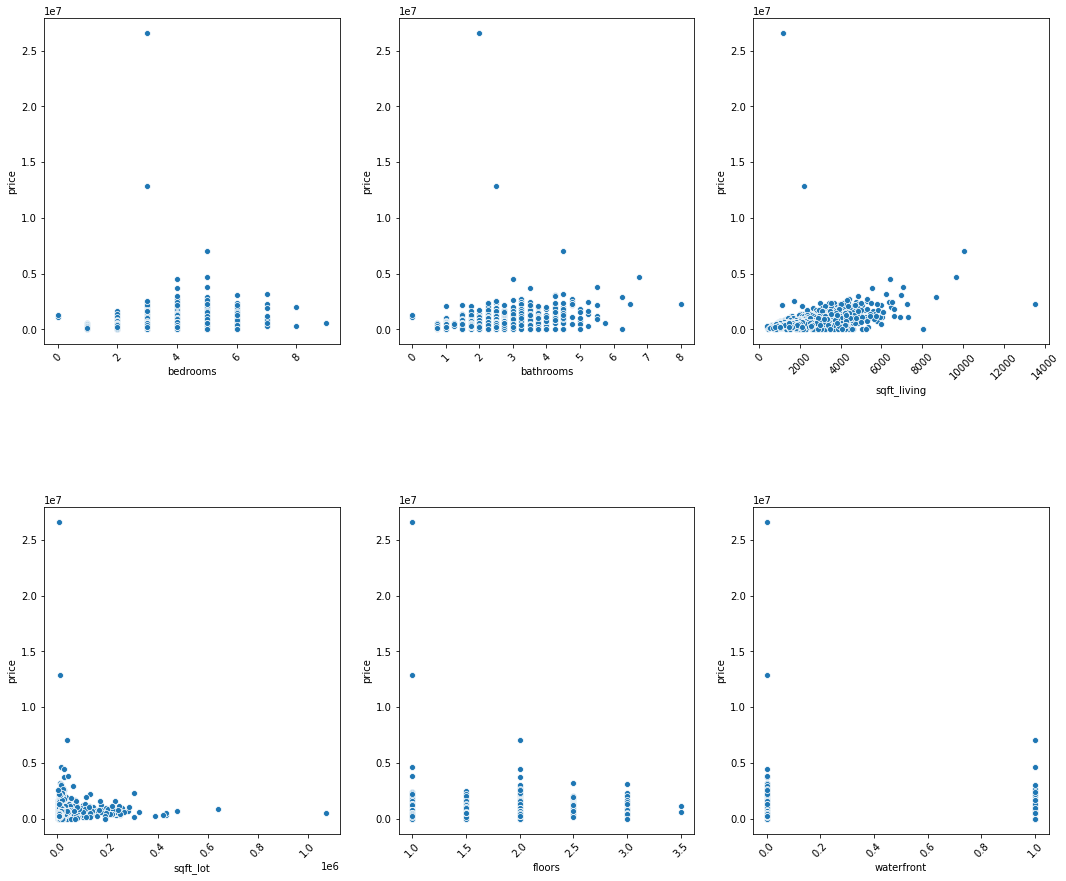

In [ ]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,columns in enumerate(columns):
    x,y = seg//3, seg%3
    an=sns.scatterplot(x=columns, y='price' ,data=house_price, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace=0.5)

In [ ]:
# Column in list way represent
columns = [ 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated' ]

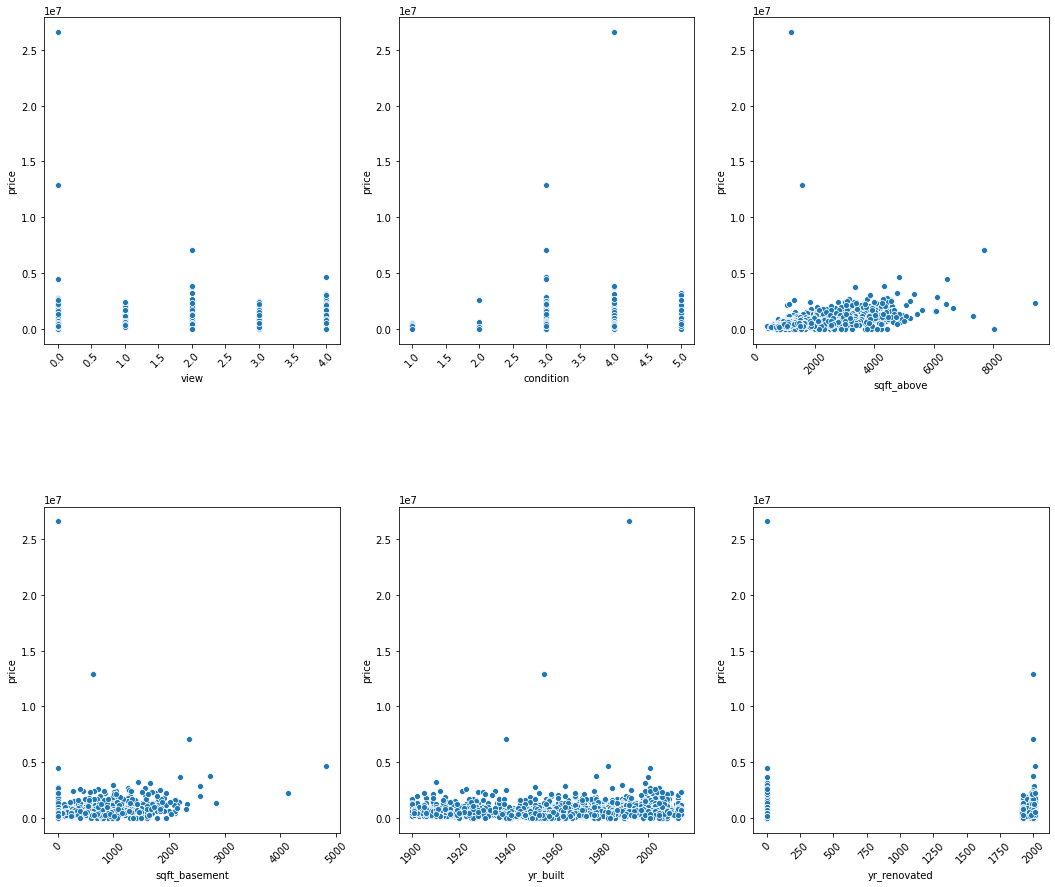

In [ ]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,columns in enumerate(columns):
    x,y = seg//3, seg%3
    an=sns.scatterplot(x=columns, y='price' ,data=house_price, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace=0.5)

In [ ]:
# Column in list way represent
columns = [ 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country' ]

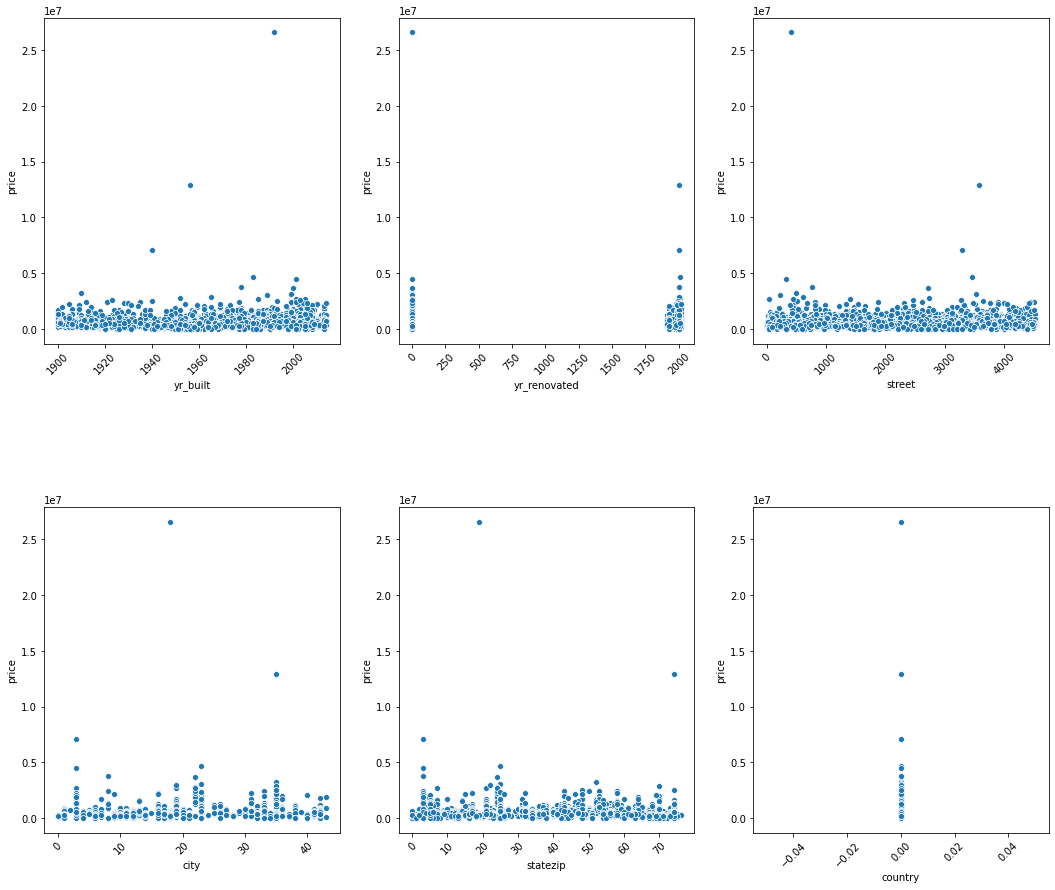

In [ ]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,columns in enumerate(columns):
    x,y = seg//3, seg%3
    an=sns.scatterplot(x=columns, y='price' ,data=house_price, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace=0.5)

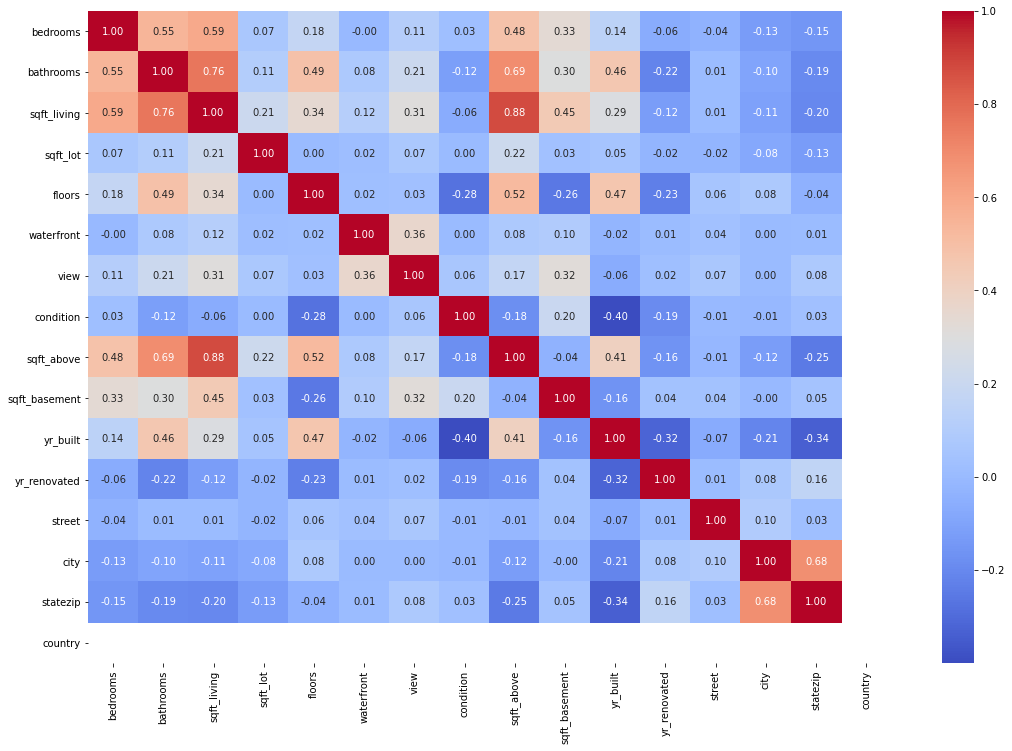

In [ ]:
# heatmap plot correlation of all independent variable

plt.figure(figsize=(18,12))
sns.heatmap(house_price[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country' ]].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [ ]:
y = house_price.pop('price')
X = house_price

In [ ]:
X_1 = X['bedrooms']
X_2 = X['bathrooms']
X_3 = X['sqft_living']

In [ ]:
# Add a constant
import statsmodels.api as sm

X_1_constant = sm.add_constant(X_1)
X_2_constant = sm.add_constant(X_2)
X_3_constant = sm.add_constant(X_3)

In [ ]:
# Create a first fitted model

fit_1 = sm.OLS(y, X_1_constant).fit()
fit_2 = sm.OLS(y, X_2_constant).fit()
fit_3 = sm.OLS(y, X_3_constant).fit()

In [ ]:
# Check parameters created

fit_1.params

const       129284.552146
bedrooms    124285.400607
dtype: float64

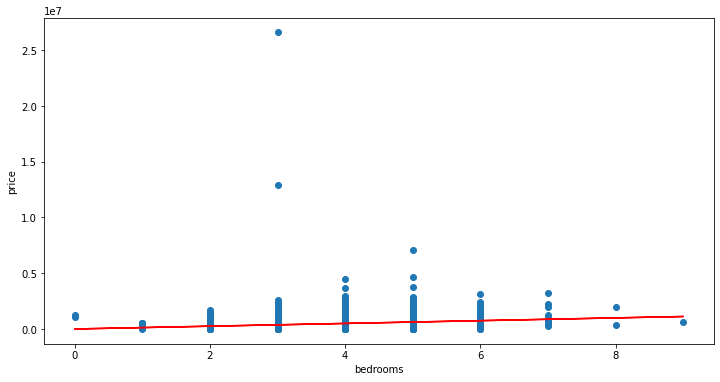

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.figure(figsize=(12, 6))
plt.scatter(X_1_constant.iloc[:, 1], y)
plt.plot(X_1_constant.iloc[:, 1], 124285.400607*X_1_constant.iloc[:, 1], 'r')
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

In [ ]:
# Check parameters created

fit_2.params

const         43489.432561
bathrooms    235315.612284
dtype: float64

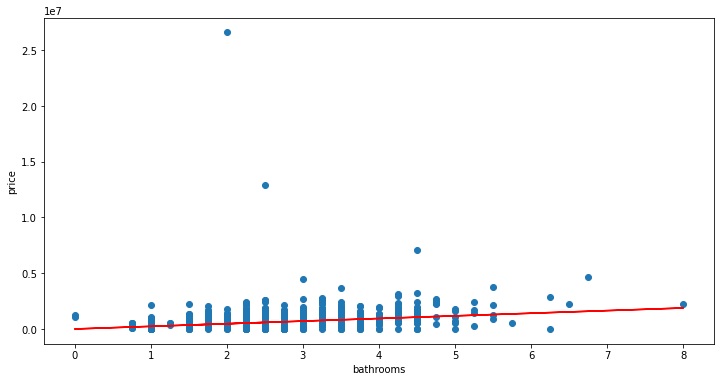

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.figure(figsize=(12, 6))
plt.scatter(X_2_constant.iloc[:, 1], y)
plt.plot(X_2_constant.iloc[:, 1], 235315.612284*X_2_constant.iloc[:, 1], 'r')
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.show()

In [ ]:
fit_3.params

const          12954.242396
sqft_living      251.950131
dtype: float64

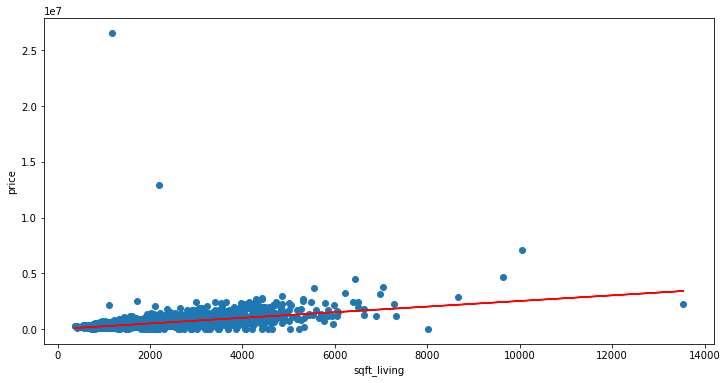

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.figure(figsize=(12, 6))
plt.scatter(X_3_constant.iloc[:, 1], y)
plt.plot(X_3_constant.iloc[:, 1] , 251.950131*X_3_constant.iloc[:, 1], 'r')
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

In [ ]:
# Print a summary of the linear regression model obtained

print(fit_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     192.3
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           7.38e-43
Time:                        17:59:44   Log-Likelihood:                -67348.
No. Observations:                4600   AIC:                         1.347e+05
Df Residuals:                    4598   BIC:                         1.347e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.293e+05   3.16e+04      4.097      0.0

In [ ]:
print(fit_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     550.9
Date:                Fri, 06 Nov 2020   Prob (F-statistic):          3.64e-115
Time:                        17:59:44   Log-Likelihood:                -67182.
No. Observations:                4600   AIC:                         1.344e+05
Df Residuals:                    4598   BIC:                         1.344e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.349e+04    2.3e+04      1.887      0.0

##   Model Measurements

In [ ]:
# mean_squared_error

from sklearn.metrics import mean_squared_error
    
mean_squared_error(y_test, y_pred)

65840680435.86691

In [ ]:
# coefficient
print('Coefficients : \n ', regression.coef_)

Coefficients : 
  [-6.29140185e+02 -5.56887899e+04  6.56796913e+04  1.57687786e+02
 -6.95565599e-01  2.40451923e+04  2.97512868e+05  4.96099242e+04
  3.37227049e+04  8.70993456e+01  7.05884407e+01 -2.21571577e+03
  7.72798108e+00  1.27557409e-01  3.15500940e+03 -1.26882474e+03
  0.00000000e+00]


In [ ]:
from sklearn.model_selection import cross_val_score

# R^2 errors
coress =cross_val_score(regression, X_train, y_train, cv=3)
np.mean(coress)

0.278917724106756

In [ ]:
# Accuracy  score

regression.score(X_test, y_test)

0.554975449452205

## Conclusion and Observations

#### we have house price data. In that data many variables like bedroom , bathroom, size.. etc .  Using machine learning algorithms linear regression train our model.  using that  trained model using we can predicted house price.   using this model we can predict mean_squared_error =  65840680435.86691  with Accuracy  score = 0.55  and R^2 Errors = 0.2789